In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

#### Use Pandas read_csv to load the us-counties.csv file.

The columns of the CSV file are:

date   - The date as a string (don't forget to convert this to a `pd.datetime`)

county - The name of the county

state  - The name of the state

fips   - The fips code of the county (the first two digits represent the state, the last three, the county)

cases  - The cumulative number of cases at the date in the county

deaths - The cumulative number of deaths in at the date in the county

In [12]:
dataframe = pd.read_csv('us-counties.csv')
dataframe['date'] = pd.to_datetime(dataframe['date'])
dataframe

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
1780869,2021-10-03,Sweetwater,Wyoming,56037.0,6959,65.0
1780870,2021-10-03,Teton,Wyoming,56039.0,4943,13.0
1780871,2021-10-03,Uinta,Wyoming,56041.0,3550,25.0
1780872,2021-10-03,Washakie,Wyoming,56043.0,1397,27.0


#### Question 1: Produce a DataFrame that contains only the data for the top 10 Counties by total number of cases

In [13]:
county_df_top = dataframe[['date','county','cases']].groupby('county').max().nlargest(10,'cases')

county_df_top = county_df_top.reset_index()
county_df_top['county']



0       Los Angeles
1     New York City
2          Maricopa
3        Miami-Dade
4              Cook
5            Harris
6            Dallas
7         San Diego
8         Riverside
9    San Bernardino
Name: county, dtype: object

####  Question 2: Produce a DataFrame that contains only the data for the top 5 states by total number of cases

In [14]:
state_df_top = dataframe[['date','state','cases']].groupby('state').max().nlargest(10,'cases')
state_df_top
state_df_top = state_df_top.reset_index('state')

In [15]:
# This chunck is for testing

#### Question 3: Calculate the incidence (the number of new cases per day... i.e. the difference between the cases on a day - the cases on a previous day) for the top 10 Counties.

In [24]:

counties = []
for i in range (10):
    counties.append(county_df_top['county'][i])
    

for county in counties:
    county_data = dataframe[(dataframe['county'] == county)&(dataframe['state'].isin(state_df_top['state']))][['date','cases']].set_index('date')
    county_data['incidence'] = county_data['cases'].rolling(2).apply(lambda x: x[1]-x[0],raw=False)
#     county_data[['incidence']].plot(xlabel=county,ylabel='case number',kind='line')
    county_data.columns = ['Date',county]
    print(county_data)
    



               Date  Los Angeles
date                            
2020-01-26        1          NaN
2020-01-27        1          0.0
2020-01-28        1          0.0
2020-01-29        1          0.0
2020-01-30        1          0.0
...             ...          ...
2021-09-29  1458381       1397.0
2021-09-30  1459891       1510.0
2021-10-01  1461354       1463.0
2021-10-02  1462717       1363.0
2021-10-03  1463743       1026.0

[617 rows x 2 columns]
               Date  New York City
date                              
2020-03-01        1            NaN
2020-03-02        1            0.0
2020-03-03        2            1.0
2020-03-04        2            0.0
2020-03-05        4            2.0
...             ...            ...
2021-09-29  1082099         1190.0
2021-09-30  1083700         1601.0
2021-10-01  1085590         1890.0
2021-10-02  1085590            0.0
2021-10-03  1085590            0.0

[582 rows x 2 columns]
              Date  Maricopa
date                        
2020-01-26

#### Question 4: Calculate the peak incidence for the 10 counties (the day with the highest number of new cases).

In [20]:
for county in counties:
    county_data = dataframe[(dataframe['county'] == county)&(dataframe['state'].isin(state_df_top['state']))][['date','cases']].set_index('date')
    county_data['incidence'] = county_data['cases'].rolling(2).apply(lambda x: x[1]-x[0],raw=False)
    peak = county_data['incidence'].max()
    print('Peak incidence for '+ county + ' ' +'is'+ ' ' +str(peak))

Peak incidence for Los Angeles is 29174.0
Peak incidence for New York City is 16715.0
Peak incidence for Maricopa is 11761.0
Peak incidence for Miami-Dade is 21655.0
Peak incidence for Cook is 6697.0
Peak incidence for Harris is 14129.0
Peak incidence for Dallas is 6162.0
Peak incidence for San Diego is 15453.0
Peak incidence for Riverside is 8341.0
Peak incidence for San Bernardino is 8026.0


#### Question 5: Plot an incidence curve for the County with the highest peak.

<AxesSubplot:xlabel='San Diego', ylabel='Incidence'>

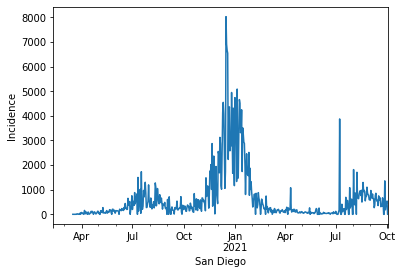

In [21]:
peak = {}

for county in counties:
    county_data = dataframe[(dataframe['county'] == county)&(dataframe['state'].isin(state_df_top['state']))][['date','cases']].set_index('date')
    county_data['incidence'] = county_data['cases'].rolling(2).apply(lambda x: x[1]-x[0],raw=False)
    peak[county]=county_data['incidence'].max()


top_county = max(peak)

top_inci = dataframe[dataframe['county'] == top_county][['date','cases']].set_index('date')
top_inci['incidence'] = county_data['cases'].rolling(2).apply(lambda x: x[1]-x[0],raw=False)
top_inci['incidence'].plot(xlabel=top_county,ylabel='Incidence',kind='line')

#### Question 6: Plot a vertical bar graph with County as the category and the peak incidence as the measure.

<BarContainer object of 10 artists>

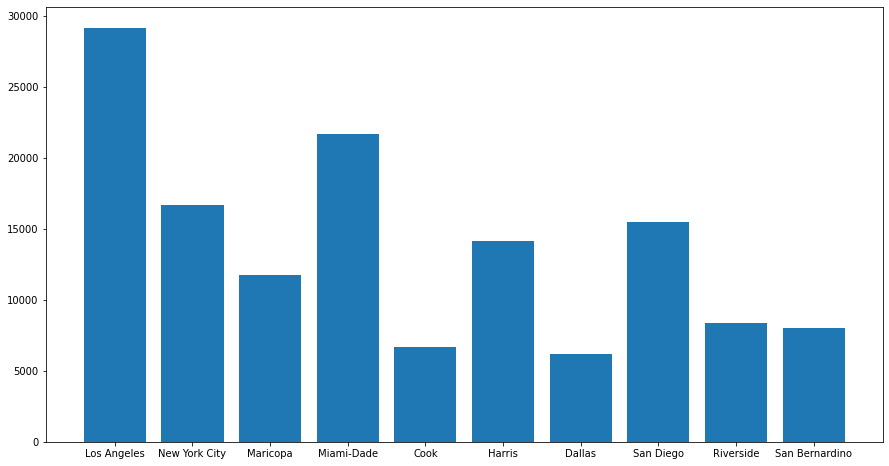

In [22]:
County = peak.keys()
peak_incidence = peak.values()
fig = plt.figure(figsize=(15,8))
plt.bar(County,peak_incidence)